In [2]:
import json
import requests
from src.common import ROLE_USER, ROLE_BOT, ROLE_SYSTEM
import time


/home/shenyl/miniconda/envs/llmapi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# llama-7b-lora

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completion' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "llama-7b-lora",
  "messages": [{"role": "system", "content": "List all Canadian provinces in alphabetical order."}],
  "stream": false
}'
```

In [8]:
URL = "http://localhost:8000/v1/chat/completion"
MODEL = "llama-7b-lora"
MESSAGES = [{'role': 'user', 'content': "The chat log [ [] ] may contain the resources I mentioned. Now I input {'Please generate a canny image based on /examples/f.jpg'}, please parse out as many as the required tasks to solve my request in a JSON format."}]
headers = {"accept": "application/json"}
data = {"data": json.dumps({"model": MODEL, "messages": MESSAGES})}

try:
    resp = requests.post(
        URL,
        data=data,
    )
    resp.raise_for_status()
    print(resp.json())
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


Server side error: {"detail":"Oops! An error occurred during inference: local variable 'instruction' referenced before assignment"}


# chatglm-6b

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/api/chat/completion' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "chatglm-6b",
  "messages": [{"role": "user", "content": "Hello world!"}],
  "stream": true
}'
```

In [32]:
URL = "http://localhost:8000/v1/chat/completion"
MODEL = "chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "Hello world!"}]
data = {"data": json.dumps({"model": MODEL, "messages": MESSAGES, "stream": True})}

try:
    resp = requests.post(URL, data=data, stream=True)
    resp.raise_for_status()
    for line in resp.iter_lines():
        result = json.loads(line)
        print(result)
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


{'choices': [{'index': 0, 'delta': {'role': 'assistant'}}]}
{'choices': [{'index': 0, 'delta': {'content': 'Hello'}}]}
{'choices': [{'index': 0, 'delta': {'content': '!'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' How'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' can'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' I'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' help'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' you'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' today'}}]}
{'choices': [{'index': 0, 'delta': {'content': '?'}}]}
{'choices': [{'index': 0, 'delta': {}}]}


# blip2zh-chatglm-6b

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completion' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "blip2zh-chatglm-6b",
  "messages": [{"role": "user", "content": "这张照片的内容是什么？", "media": ["Doge.jpg"]}],
  "stream": true
}' \
  -F 'files=@doc/img/Doge.jpg;type=image/jpeg;filename=Doge.jpg'
```

If you want send multiple files:

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completion' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "blip2zh-chatglm-6b",
  "messages": [{"role": "user", "content": "这张照片的内容是什么？", "media": ["Doge.jpg"]}],
  "stream": true
}' \
  -F 'files=@doc/img/Doge.jpg;type=image/jpeg;filename=Doge.jpg' \
  -F 'files=@doc/img/mm-chat-overview.png;type=image/png;filename=mm-chat-overview.png'
```

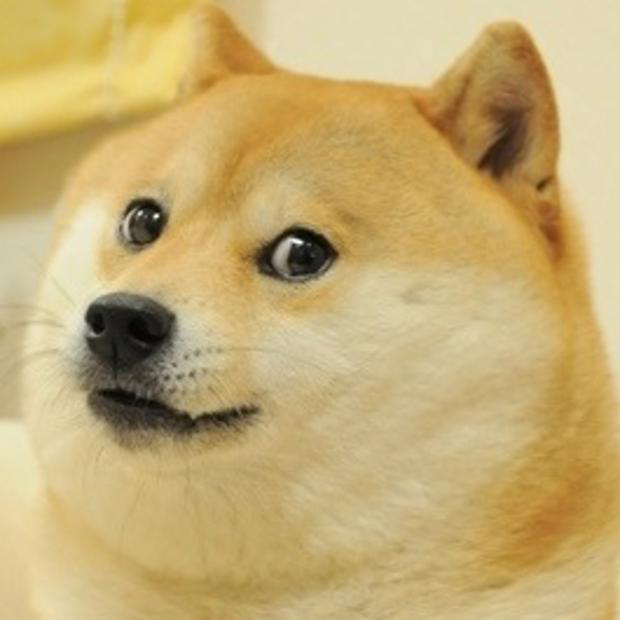

{'choices': [{'index': 0, 'delta': {'role': 'assistant'}}]}
{'choices': [{'index': 0, 'delta': {'content': ''}}]}
{'choices': [{'index': 0, 'delta': {'content': '这张图'}}]}
{'choices': [{'index': 0, 'delta': {'content': '是'}}]}
{'choices': [{'index': 0, 'delta': {'content': '一张'}}]}
{'choices': [{'index': 0, 'delta': {'content': '描述'}}]}
{'choices': [{'index': 0, 'delta': {'content': '狗狗'}}]}
{'choices': [{'index': 0, 'delta': {'content': '的图片'}}]}
{'choices': [{'index': 0, 'delta': {'content': '，'}}]}
{'choices': [{'index': 0, 'delta': {'content': '有一只'}}]}
{'choices': [{'index': 0, 'delta': {'content': '黄色的'}}]}
{'choices': [{'index': 0, 'delta': {'content': '狗狗'}}]}
{'choices': [{'index': 0, 'delta': {'content': '，'}}]}
{'choices': [{'index': 0, 'delta': {'content': '戴着'}}]}
{'choices': [{'index': 0, 'delta': {'content': '一只'}}]}
{'choices': [{'index': 0, 'delta': {'content': '长'}}]}
{'choices': [{'index': 0, 'delta': {'content': '颈'}}]}
{'choices': [{'index': 0, 'delta': {'content': 

In [29]:
imgurl = "https://imgflip.com/s/meme/Doge.jpg"
image = requests.get(imgurl, stream=True).raw.read()
from PIL import Image
import io
display(Image.open(io.BytesIO(image)).convert("RGB"))

URL = "http://localhost:8000/v1/chat/completion"
MODEL = "blip2zh-chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "这张图的内容是什么？", "media": ["Doge.jpg"]}]
data = {"data": json.dumps({"model": MODEL, "messages": MESSAGES, "stream": True})}
files = [
    (
        "files",
        (
            "Doge.jpg",
            image,
            "image/jpeg",
        ),
    ),
    # NOTE: if you want multiple files in history
    # (
    #     "files",
    #     (
    #         "mm-chat-overview.png",
    #         open("doc/img/mm-chat-overview.png", "rb"),
    #         "image/png",
    #     ),
    # ),
]

try:
    resp = requests.post(URL, data=data, files=files, stream=True)
    resp.raise_for_status()
    for line in resp.iter_lines():
        result = json.loads(line)
        print(result)
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


# Concurrency Test

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Hello! How can I assist you today?
Hello! How can I help you today?
Hello! How can I help you today?
Hello! How can I assist you today?
Hello! How can I help you today?
Hello! How can I assist you today?
Hello! How can I assist you today?
Hello! How can I help you today?
Hello! How can I assist you today?
Hello! How can I help you today?


[]

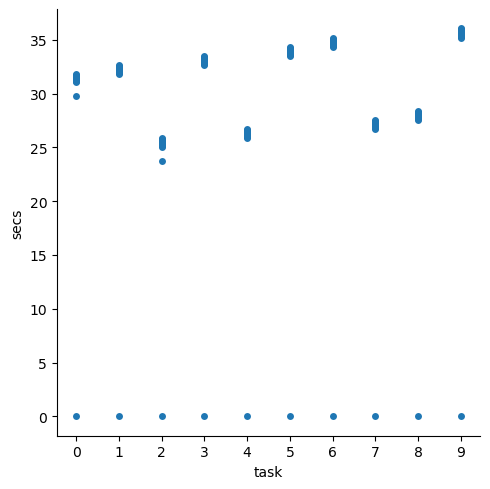

In [4]:
from datetime import datetime
import threading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

URL = "http://localhost:8000/v1/chat/completion"
MODEL = "chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "Hello world!"}]
data = {"data": json.dumps({"model": MODEL, "messages": MESSAGES, "stream": True})}
N = 10
ts = [[] for _ in range(N)]
results = ["" for _ in range(N)]
# ts_lock = threading.Lock()

def send_fn(index: int):
    try:
        text = ""
        ts[index].append(datetime.now())
        resp = requests.post(URL, data=data, stream=True)
        resp.raise_for_status()
        for line in resp.iter_lines():
            result = json.loads(line)
            ts[index].append(datetime.now())
            text += result["choices"][0]["delta"].get("content", "")
            # print(result)
        results[index] = text
    except requests.exceptions.HTTPError as err:
        print(f"Server side error: {err.response.text}")


# Send requests with cold-start, the server will load models from disk
threads = []
for i in range(N):
    t = threading.Thread(target=send_fn, args=(i,))
    t.start()
    threads.append(t)
for i in range(N):
    threads[i].join()

earliest = min([t[0] for t in ts])
samples = []
for i in range(N):
    for t in ts[i]:
        samples.append([str(i), (t - earliest).total_seconds()])
df0 = pd.DataFrame(samples, columns=["task", "secs"])

for result in results:
    print(result)

sns.catplot(x="task", y="secs", data=df0, jitter=False)

plt.plot()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[]

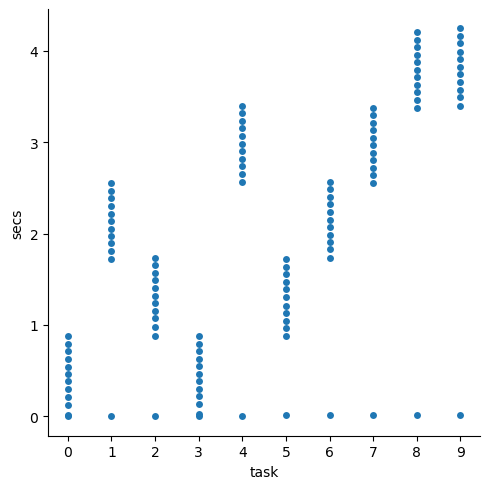

In [5]:
time.sleep(20)         # wait for model loading

ts = [[] for _ in range(N)]
# Send requests again, without cold-start
threads = []
for i in range(N):
    t = threading.Thread(target=send_fn, args=(i,))
    t.start()
    threads.append(t)
for i in range(N):
    threads[i].join()

earliest = min([t[0] for t in ts])
samples = []
for i in range(N):
    for t in ts[i]:
        samples.append([str(i), (t - earliest).total_seconds()])
df1 = pd.DataFrame(samples, columns=["task", "secs"])

sns.catplot(x="task", y="secs", data=df1, jitter=False)

plt.plot()